# TRD-653: Recognizing immediate deletions

In [1]:
%use hyper-collate(1.3.5-SNAPSHOT-10)

Welcome to HyperCollate 1.3.5-SNAPSHOT-10
Using GraphViz: dot - graphviz version 2.40.1 (20161225.0304)



In [2]:
val wA = HC.importXMLWitness("A", "<s>and now gave such a pull</s>")

### A regular deletion:

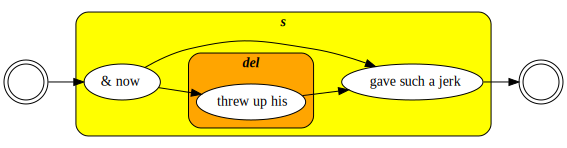

In [3]:
val wB = HC.importXMLWitness("B", """
            <s>&amp; now <del>threw up his</del> gave such a jerk</s>
            """.trimMargin())
wB.show()

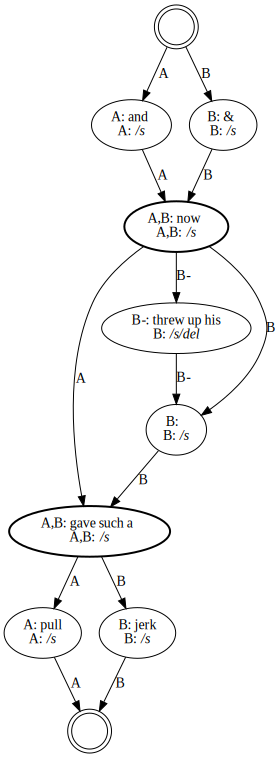

In [4]:
val cg = HC.collate(wA,wB)
cg.show()

In [5]:
cg.asHtml()

A,and,now,,gave such a,pull
B,&,now,threw up his,gave such a,jerk


In [6]:
cg.asASCIITable()

┌───┬────┬────┬────────────────┬────────────┬────┐
│[A]│and │now │                │gave such a │pull│
├───┼────┼────┼────────────────┼────────────┼────┤
│[B]│&   │now │[-] threw up his│gave such a │jerk│
└───┴────┴────┴────────────────┴────────────┴────┘

## According to the TEI Guidelines, there are 3 ways to encode immediate deletions:
### 1: &lt;del seq="0"&gt;

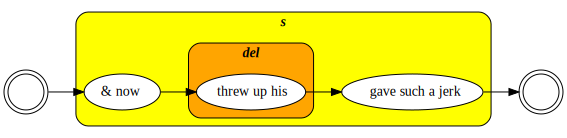

In [7]:
val wC = HC.importXMLWitness("C", """
            <s>&amp; now <del seq="0">threw up his</del> gave such a jerk</s>
            """.trimMargin())
wC.show()

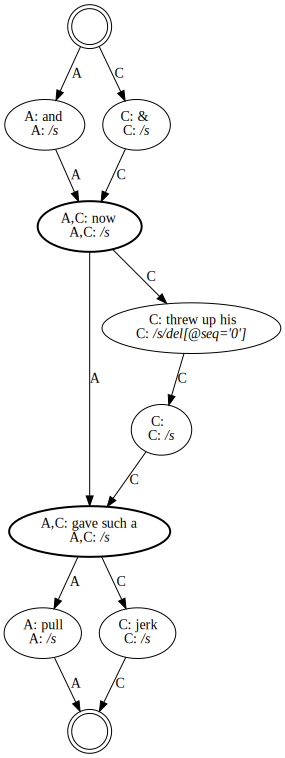

In [8]:
val cg = HC.collate(wA,wC)
cg.show()

In [9]:
cg.asHtml()

A,and,now,gave such a,pull
C,&,now,threw up his gave such a,jerk


In [10]:
cg.asASCIITable()

┌───┬────┬────┬────────────────┬────┐
│[A]│and │now │gave such a     │pull│
├───┼────┼────┼────────────────┼────┤
│[C]│    │    │gave such a     │    │
│   │&   │now │[-] threw up his│jerk│
└───┴────┴────┴────────────────┴────┘

### 2: &lt;del instant="true"&gt;

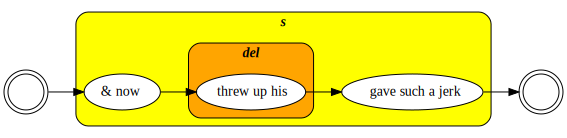

In [11]:
val wD = HC.importXMLWitness("D", """
            <s>&amp; now <del instant="true">threw up his</del> gave such a jerk</s>
            """.trimMargin())
wD.show()

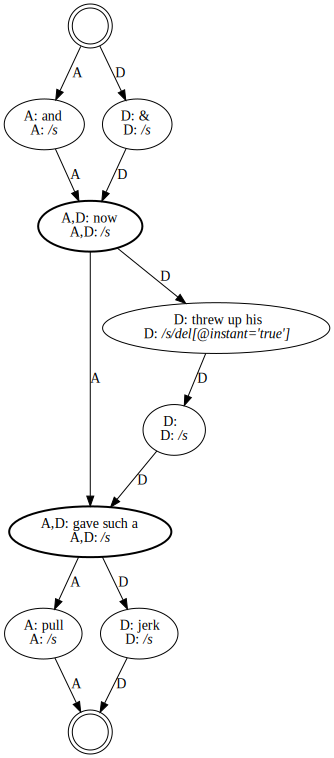

In [12]:
val cg = HC.collate(wA,wD)
cg.show()

In [13]:
cg.asHtml()

A,and,now,gave such a,pull
D,&,now,threw up his gave such a,jerk


In [14]:
cg.asASCIITable()

┌───┬────┬────┬────────────────┬────┐
│[A]│and │now │gave such a     │pull│
├───┼────┼────┼────────────────┼────┤
│[D]│    │    │gave such a     │    │
│   │&   │now │[-] threw up his│jerk│
└───┴────┴────┴────────────────┴────┘

### 3: &lt;del type="immediate"&gt;

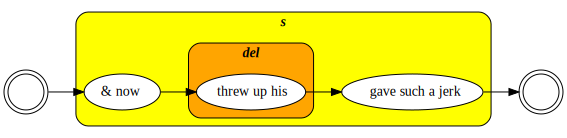

In [15]:
val wE = HC.importXMLWitness("E", """
            <s>&amp; now <del type="immediate">threw up his</del> gave such a jerk</s>
            """.trimMargin())
wE.show()

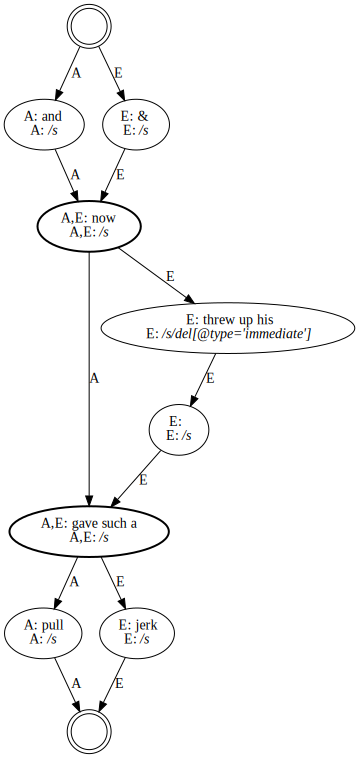

In [16]:
val cg = HC.collate(wA,wE)
cg.show()

In [17]:
cg.asHtml()

A,and,now,gave such a,pull
E,&,now,threw up his gave such a,jerk


In [18]:
cg.asASCIITable()

┌───┬────┬────┬────────────────┬────┐
│[A]│and │now │gave such a     │pull│
├───┼────┼────┼────────────────┼────┤
│[E]│    │    │gave such a     │    │
│   │&   │now │[-] threw up his│jerk│
└───┴────┴────┴────────────────┴────┘